# Load The Dataset

In [ ]:
import pandas as pd

df = pd.read_json('/home/ridit.jain.21cse/yelp_academic_dataset_review.json', lines=True)

print(df.head())


                review_id                 user_id             business_id   
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw  \
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool   
0      3       0      0     0  \
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

# About the dataset

Dataset is a curated selection from the broader Yelp Academic Dataset, concentrating on reviews for restaurants. This subset allows for focused analysis on the dining industry, offering details into customer preferences, dining experiences, and sentiment towards restaurants across various locations.



# Structure of data

**review_id:** A unique identifier for each review, facilitating easy referencing and analysis.

**user_id:** Identifies the user who wrote the review, allowing for exploration of user activity and preferences.

**business_id:** Corresponds to the specific restaurant being reviewed, enabling aggregation and analysis at the business level.

**stars:**The star rating (1-5) given by the reviewer, providing a quantitative measure of the user's sentiment towards the dining experience.

**useful, funny, cool:** Votes from other users on the review, offering a social perspective on the review's content and impact.

**text:** The textual content of the review, rich with insights into the customer's experience, reasons behind their rating, and specific feedback about the restaurant.

**date:** The date the review was posted, useful for temporal analysis and understanding trends over time.

# Data Preprocessing

Deleting 97% of dataset (truncateing as per system requirements)

In [ ]:
rows_to_delete = int(len(df) * 0.97)

rows_to_delete_indices = df.sample(n=rows_to_delete, random_state=42).index

df_reduced = df.drop(rows_to_delete_indices)

print(f"Original DataFrame size: {len(df)}")
print(f"Reduced DataFrame size: {len(df_reduced)}")


Original DataFrame size: 6990280
Reduced DataFrame size: 209709


In [ ]:
df=df_reduced

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()




[nltk_data] Downloading package punkt to
[nltk_data]     /home/ridit.jain.21cse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ridit.jain.21cse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ridit.jain.21cse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    # Removeing non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Removeing stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)



In [ ]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)
print(df[['text', 'preprocessed_text']].head())

                                                  text   
21   Upland is a brewery based out of Bloomington, ...  \
37   We checked in around 2:30 pm.  Check-in was qu...   
69   Our family returned for breakfast again this w...   
86   I'm so incredibly happy with our pictures! Ang...   
184  Picked up takeout from Village Whiskey (so I c...   

                                     preprocessed_text  
21   upland brewery based bloomington indiana becom...  
37   checked around pm checkin quick easy complimen...  
69   family returned breakfast weekend food service...  
86   im incredibly happy picture angela clifton pho...  
184  picked takeout village whiskey cant review act...  


# Exploratory Data Analysis (EDA):

In [ ]:
from matplotlib import pyplot as  plt

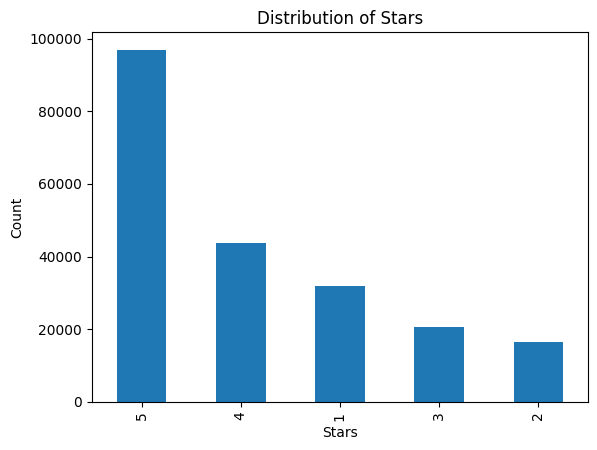

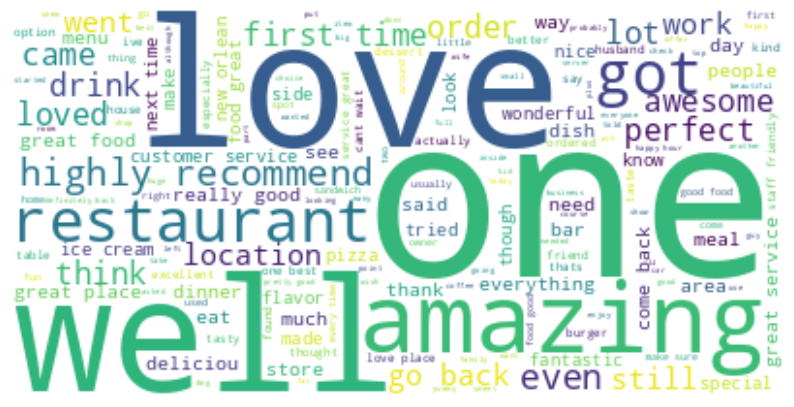

In [ ]:
# Distribution of stars
df['stars'].value_counts().plot(kind='bar')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

# Word Cloud for positive reviews
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['stars'] >= 4]['preprocessed_text'].tolist())
wordcloud = WordCloud(background_color='white', max_words=200).generate(positive_reviews)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


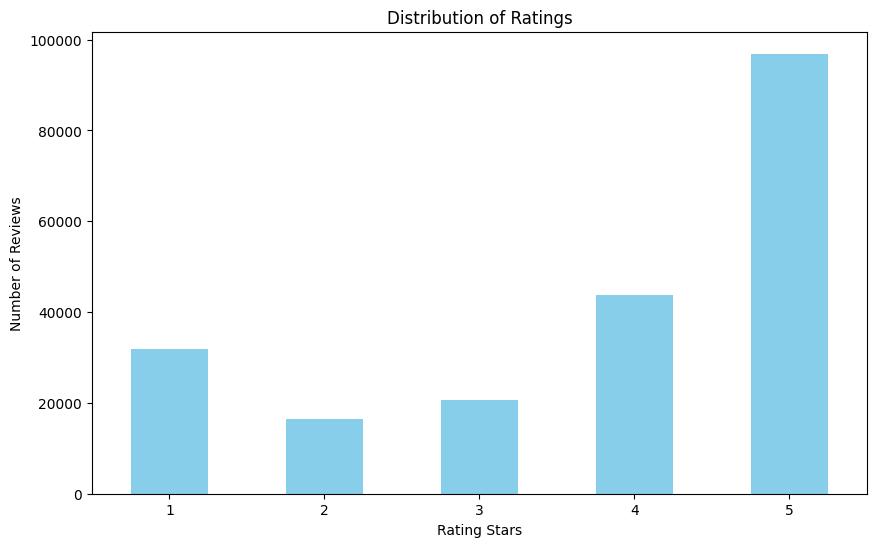

In [ ]:
import matplotlib.pyplot as plt

df['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribution of Ratings')
plt.xlabel('Rating Stars')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


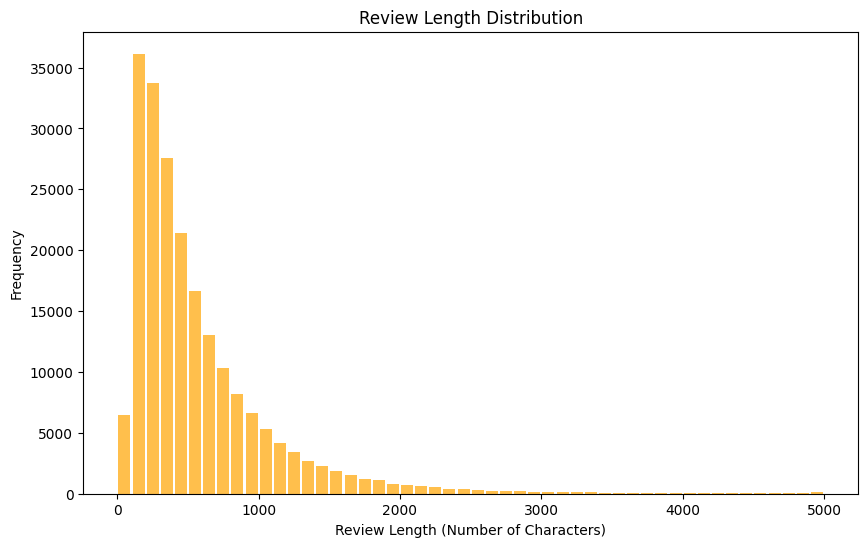

In [ ]:
df['review_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='orange', alpha=0.7, rwidth=0.85)
plt.title('Review Length Distribution')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()


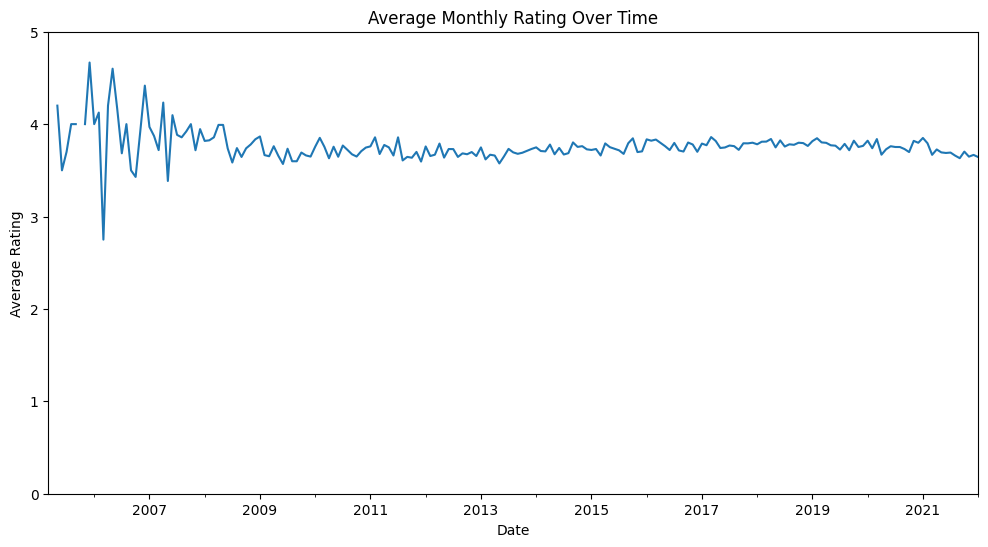

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))
df.resample('M')['stars'].mean().plot()
plt.title('Average Monthly Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /home/ridit.jain.21cse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


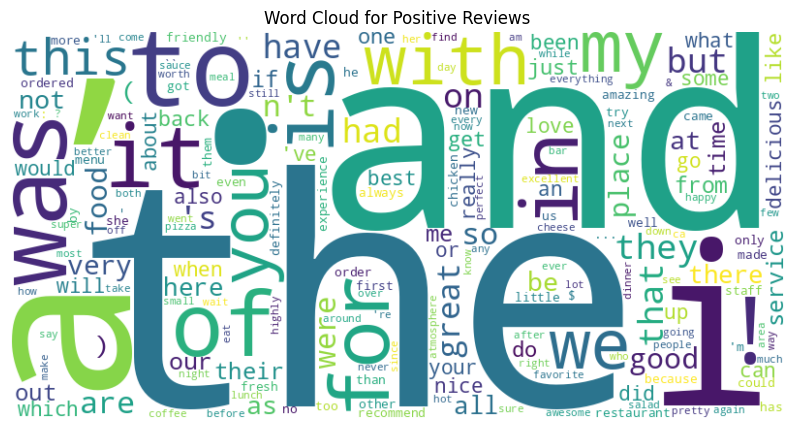

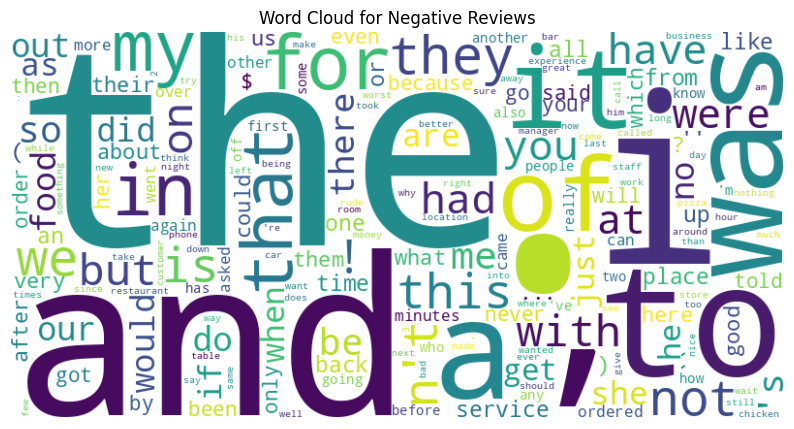

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('punkt')

word_freq_positive = Counter(words_positive)
word_freq_negative = Counter(words_negative)

# Word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_positive)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_negative)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


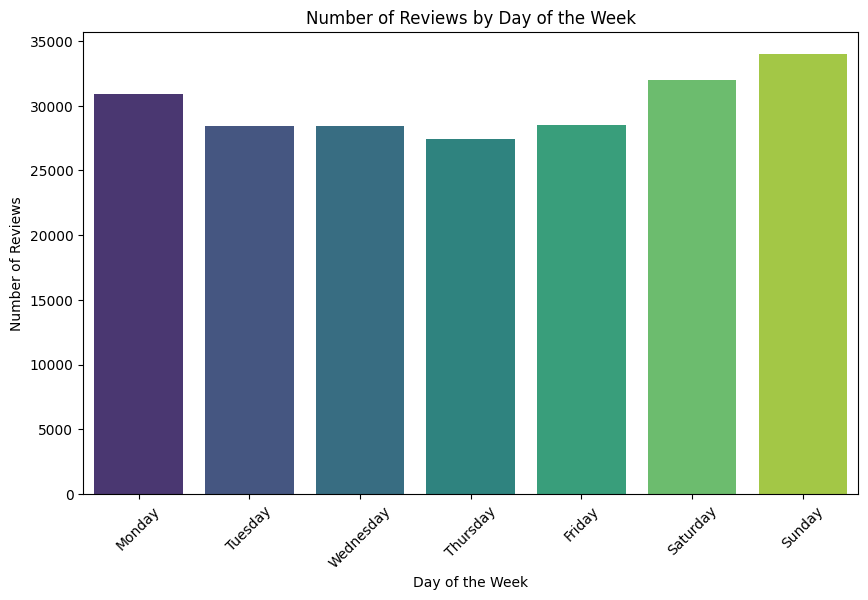

In [ ]:
import seaborn as sns

df['day_of_week'] = df.index.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Number of Reviews by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


# Feature extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['preprocessed_text']).toarray()

print(X.shape)


(209709, 1000)


It limits the output to the top 1000 features (words or tokens) based on their TF-IDF scores, which reflect how important a word is to a document in a collection. The fit_transform method learns the vocabulary and the IDF (inverse document frequency) weights, then transforms the preprocessed_text column into a sparse matrix of TF-IDF features, which is then converted to a dense array. The printed shape of X shows the number of reviews and the 1000 features, indicating the dataset is ready for further analysis or model training.

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
y = (df['stars'] >= 4).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest Classifier**

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)



**Support Vector Machine**

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)



In [ ]:
y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test)

# Model Evaluation

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     13592
           1       0.88      0.94      0.91     28350

    accuracy                           0.87     41942
   macro avg       0.87      0.84      0.85     41942
weighted avg       0.87      0.87      0.87     41942



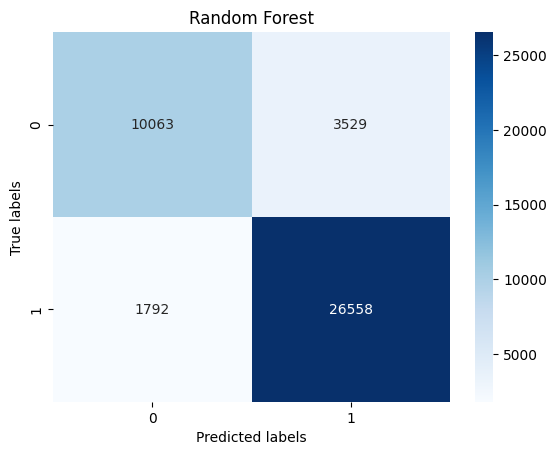

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75     13592
           1       0.86      0.94      0.90     28350

    accuracy                           0.86     41942
   macro avg       0.85      0.81      0.83     41942
weighted avg       0.86      0.86      0.85     41942



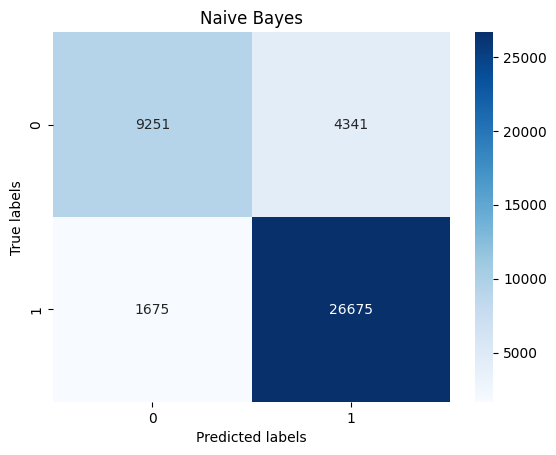

Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     13592
           1       0.91      0.93      0.92     28350

    accuracy                           0.89     41942
   macro avg       0.88      0.87      0.88     41942
weighted avg       0.89      0.89      0.89     41942



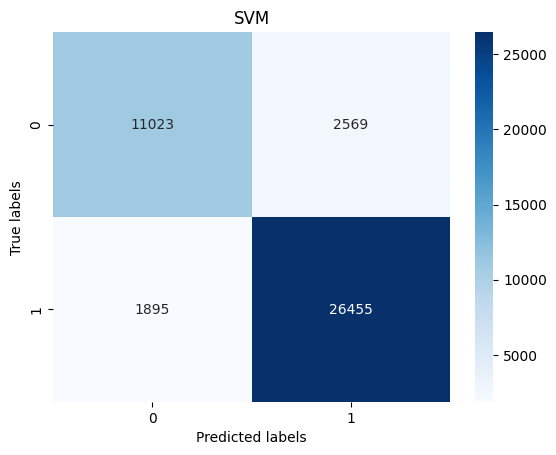

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Random Forest")

print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

print("Support Vector Machine Classifier:")
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, "SVM")


# Comparison Analysis

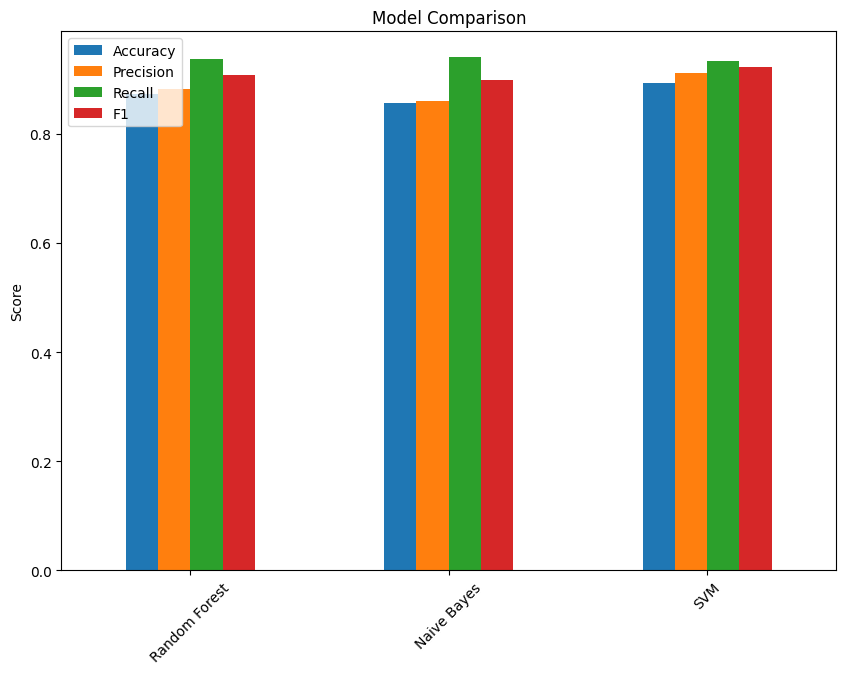

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'], columns=['Random Forest', 'Naive Bayes', 'SVM'])
metrics['Random Forest'] = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test, y_pred)
]
metrics['Naive Bayes'] = [
    accuracy_score(y_test, y_pred_nb),
    precision_score(y_test, y_pred_nb),
    recall_score(y_test, y_pred_nb),
    f1_score(y_test, y_pred_nb)
]
metrics['SVM'] = [
    accuracy_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_svm)
]

metrics.T.plot(kind='bar', figsize=(10, 7))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()



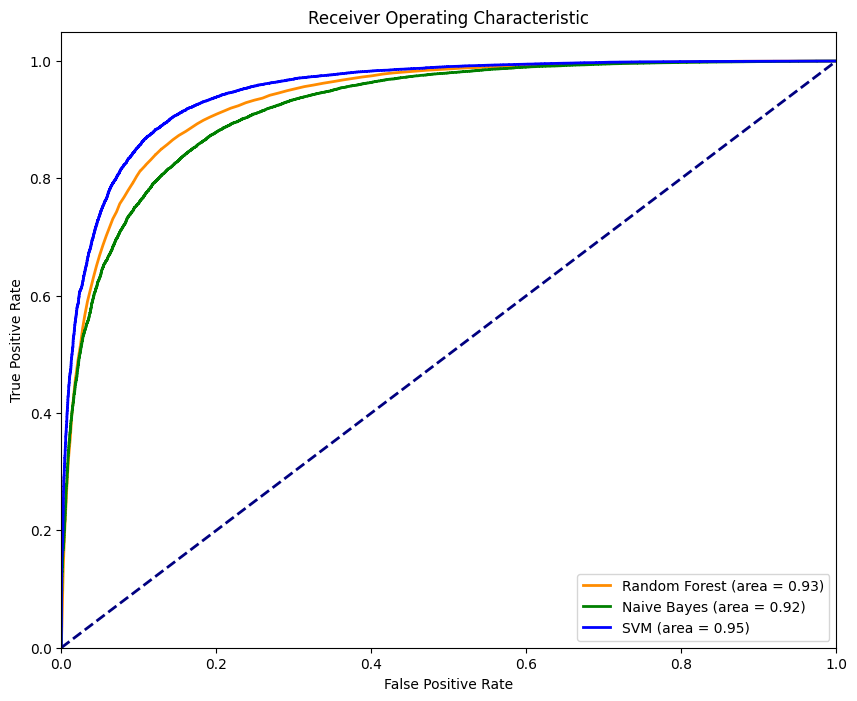

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

y_prob_rf = model.predict_proba(X_test)[:, 1]

y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

y_decision_svm = svm_model.decision_function(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_decision_svm)
roc_auc_svm = roc_auc_score(y_test, y_decision_svm)

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, color='green', lw=lw, label='Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=lw, label='SVM (area = %0.2f)' % roc_auc_svm)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
/Users/jains/Downloads/NLP_LAB4.ipynb

scp /Users/jains/Downloads/NLP_LAB4.ipynb ridit.jain.21cse@10.1.1.18:/home/ridit.jain.21cse